# CIFAR-10 Image Classification using PyTorch

A simple CNN trained on CIFAR-10 to classify images into 10 object categories.


### Setup and Importation

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np


### Writing Data Augmentation and Transformation functions for the Dataset

In [39]:
transform_train = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding=4),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5),
                         (0.5, 0.5, 0.5))
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5),
                         (0.5, 0.5, 0.5))
])


### Importing the Dataset from torchvision and performing transformations to the training and testing datasets

In [40]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)

### Using DataLoader to make a 64 sized batch of Images

In [30]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)


classes = trainset.classes

### Visualising a Sample of Training Dataset

['truck', 'cat', 'airplane', 'deer', 'frog', 'cat', 'deer', 'horse']

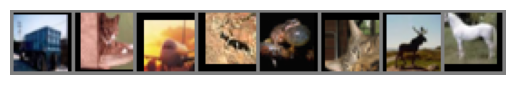

In [31]:
def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis('off')

images, labels = next(iter(trainloader))
imshow(torchvision.utils.make_grid(images[:8]))
[classes[i] for i in labels[:8]]


### Defining a Simple CNN
##### Two convolutional blocks followed by dense layers for efficient image recognition

In [32]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(3, 32, 3, padding=1), nn.ReLU(),
            nn.Conv2d(32, 64, 3, padding=1), nn.ReLU(),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(64, 128, 3, padding=1), nn.ReLU(),
            nn.MaxPool2d(2,2)
        )
        self.fc = nn.Sequential(
            nn.Linear(128*8*8, 256), nn.ReLU(),
            nn.Linear(256, 10)
        )

    def forward(self, x):
        x = self.conv(x)
        x = x.view(x.size(0), -1)
        return self.fc(x)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SimpleCNN().to(device)


### Defining a Loss function and a Optimizer

##### Loss Function used- Cross Entropy Loss
Optimizer used- Adam Optimizer

In [33]:
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

train_accuracy = []
test_accuracy = []


### Defining a Simple accuracy function for calculating Training and Testing Accuracies

In [34]:
def accuracy(loader):
    correct, total = 0, 0
    model.eval()
    with torch.no_grad():
        for imgs, labels in loader:
            imgs, labels = imgs.to(device), labels.to(device)
            outputs = model(imgs)
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)
    model.train()
    return correct / total


### Training Loop with 10 Epochs

In [35]:
epochs = 10
for epoch in range(epochs):
    for imgs, labels in trainloader:
        imgs, labels = imgs.to(device), labels.to(device)

        optimizer.zero_grad()
        loss = loss_fn(model(imgs), labels)
        loss.backward()
        optimizer.step()

    train_accuracy.append(accuracy(trainloader))
    test_accuracy.append(accuracy(testloader))

    print(f"Epoch {epoch+1}/{epochs} | Train Acc: {train_accuracy[-1]*100:.2f}% | Test Acc: {test_accuracy[-1]*100:.2f}%")


Epoch 1/10 | Train Acc: 55.88% | Test Acc: 61.05%
Epoch 2/10 | Train Acc: 65.44% | Test Acc: 68.17%
Epoch 3/10 | Train Acc: 71.69% | Test Acc: 73.46%
Epoch 4/10 | Train Acc: 73.68% | Test Acc: 74.86%
Epoch 5/10 | Train Acc: 75.73% | Test Acc: 75.95%
Epoch 6/10 | Train Acc: 77.65% | Test Acc: 77.24%
Epoch 7/10 | Train Acc: 79.07% | Test Acc: 78.99%
Epoch 8/10 | Train Acc: 78.46% | Test Acc: 78.45%
Epoch 9/10 | Train Acc: 80.00% | Test Acc: 78.78%
Epoch 10/10 | Train Acc: 80.69% | Test Acc: 79.65%


### Plotting Accuracy Graph over Epochs

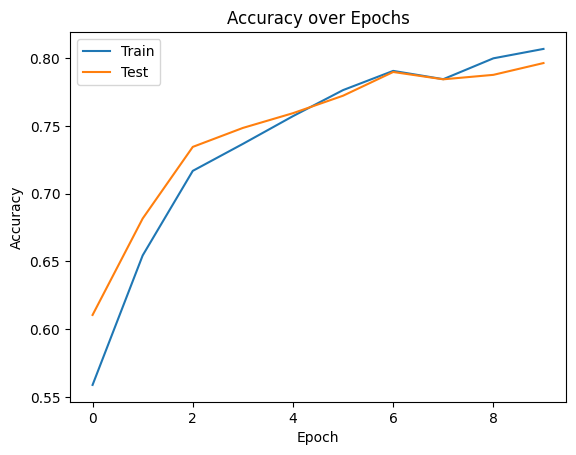

In [36]:
plt.plot(train_accuracy, label='Train')
plt.plot(test_accuracy, label='Test')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Accuracy over Epochs")
plt.show()


### Sample Output on Dataset after Training

Pred: ['cat', 'ship', 'ship', 'airplane', 'frog', 'frog', 'dog', 'deer']
True: ['cat', 'ship', 'ship', 'airplane', 'frog', 'frog', 'automobile', 'frog']


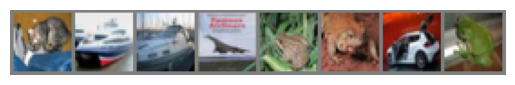

In [37]:
dataiter = iter(testloader)
images, labels = next(dataiter)
images, labels = images.to(device), labels.to(device)

outputs = model(images)
_, preds = torch.max(outputs, 1)

imshow(torchvision.utils.make_grid(images[:8].cpu()))
print("Pred:", [classes[p] for p in preds[:8]])
print("True:", [classes[t] for t in labels[:8]])


### Saving the Model Parameters

In [38]:
torch.save(model.state_dict(), "cifar10_cnn.pth")

## Conclusion
This project trained using a simple CNN on CIFAR-10 and achieved ~80% test accuracy. Future improvements can include using deeper architectures like ResNet-18, tuning hyperparameters, and adding Grad-CAM visualization.
